In [1]:
import pandas as pd

# Load the train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Check the first few rows to make sure the data is loaded correctly
print(train.head())
print(test.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
# Extract labels from the training data
Y_train = train["label"]

# Drop the label column from X_train
X_train = train.drop(labels=["label"], axis=1)

# Check the dimensions of X_train and Y_train to confirm
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [3]:
# Check for missing values in the training data
print(X_train.isnull().sum().sum())  # Should return 0 if no missing values

# Check for missing values in the test data
print(test.isnull().sum().sum())  # Should also return 0

0
0


In [4]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
test = test / 255.0

In [5]:
# Reshape the data to 28x28x1 (28x28 image size, 1 channel)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Check the new shape
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [7]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 273.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 5.1 MB/s eta 0:00:00ta 0:00:01


In [10]:
from tensorflow.keras.utils import to_categorical

In [12]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=10)

# Check the shape of Y_train after encoding
print(Y_train.shape)

(42000, 10)


In [13]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 2

# Split the training data into 90% training and 10% validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

# Check the new shapes
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(37800, 28, 28, 1) (37800, 10)
(4200, 28, 28, 1) (4200, 10)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input

# Initialize the CNN model
model = Sequential()

# Define the input layer explicitly
model.add(Input(shape=(28, 28, 1)))

# First block of Conv2D and MaxPooling
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second block of Conv2D and MaxPooling
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten the data to feed into fully connected (Dense) layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

# Output layer (10 categories for digits 0-9)
model.add(Dense(10, activation="softmax"))

In [16]:
from tensorflow.keras.optimizers import RMSprop

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set a learning rate reduction callback to reduce the learning rate when accuracy plateaus
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Define the number of epochs and batch size
epochs = 10
batch_size = 86

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_val, Y_val), verbose=2, 
                    callbacks=[learning_rate_reduction])

Epoch 1/10
440/440 - 75s - 171ms/step - accuracy: 0.9152 - loss: 0.2606 - val_accuracy: 0.9790 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 2/10
440/440 - 66s - 151ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.9833 - val_loss: 0.0594 - learning_rate: 0.0010
Epoch 3/10
440/440 - 78s - 178ms/step - accuracy: 0.9838 - loss: 0.0565 - val_accuracy: 0.9905 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 4/10
440/440 - 77s - 175ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9886 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 5/10
440/440 - 74s - 168ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9907 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 6/10
440/440 - 58s - 133ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9919 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 7/10
440/440 - 46s - 104ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9902 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 8/10
440/440 - 48s - 108ms/s

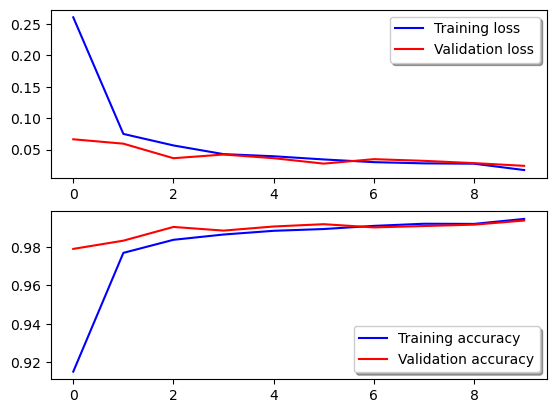

In [19]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [20]:
import os
os.getcwd()

'/Users/audrey/Number Identification'